In [1]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random
import glob
import torch
import os
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import json
import requests
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

<h2> Prepare folders 

In [2]:
#imagepath="Instagram_images/instagram_data/img"
images_paths = glob.glob("Instagram_images/instagram_data/img/*")
print (len(images_paths))

test_paths= glob.glob("test_images/*")
print (len(test_paths))

20515
28


In [3]:
url= "https://huggingface.co/datasets/huggingface/label-files/raw/main/coco-detection-id2label.json"
response = requests.get(url)
coco_labels = json.loads(response.text)
labels_dict = {int(k): v for k, v in coco_labels.items()}

<h2> Initiate Object Detection Model

In [4]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [5]:
# Load Faster R-CNN model (pre-trained on COCO)
faster_rcnn = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
faster_rcnn.eval()

/Users/user/opt/miniconda3/envs/tf_clustering/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/user/opt/miniconda3/envs/tf_clustering/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

<h2> Detect a single image

Detected Objects (Labels, Scores): [(1, 0.9959079), (3, 0.99368155), (2, 0.95408475), (3, 0.9411216), (28, 0.9181715), (1, 0.9141608), (2, 0.8990338), (1, 0.8014378), (1, 0.7232532), (64, 0.66065776)]


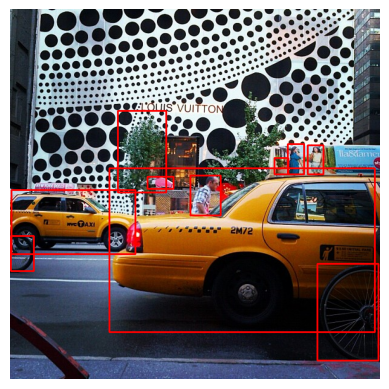

In [8]:

# Function to run object detection
def detect_objects_faster_rcnn(image_path, threshold=0.5):
    # Load image
    image = Image.open(image_path).convert("RGB")
    
    # Transform image
    transform = transforms.Compose([transforms.ToTensor()])
    img_tensor = transform(image).unsqueeze(0)
    
    # Perform detection
    with torch.no_grad():
        outputs = faster_rcnn(img_tensor)
    
    # Filter results based on confidence threshold
    boxes = outputs[0]['boxes'].numpy()
    labels = outputs[0]['labels'].numpy()
    scores = outputs[0]['scores'].numpy()
    
    filtered_boxes = boxes[scores >= threshold]
    filtered_labels = labels[scores >= threshold]
    filtered_scores = scores[scores >= threshold]
    
    # Display results
    print(f"Detected Objects (Labels, Scores): {list(zip(filtered_labels, filtered_scores))}")
    
    # Draw boxes on the image
    image_cv = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    for box in filtered_boxes:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image_cv, (x1, y1), (x2, y2), (255, 0, 0), 2)
    
    plt.imshow(image_cv)
    plt.axis("off")
    plt.show()

# Test with a single image
image_path = images_paths[9176]  # Replace with your image path
detect_objects_faster_rcnn(image_path)


<h2> Detect objects and scores in images

In [10]:
images_training= images_paths.copy()
random.shuffle(images_training)

In [11]:
#detect all images

In [ ]:

# Function to detect objects in an image
def detect_objects(image_path, threshold=0.5):
    # Load and transform the image
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([transforms.ToTensor()])
    img_tensor = transform(image).unsqueeze(0)
    
    # Perform detection
    with torch.no_grad():
        outputs = faster_rcnn(img_tensor)
    
    # Filter results based on confidence threshold
    labels = outputs[0]['labels'].numpy()
    scores = outputs[0]['scores'].numpy()
    labels_filtered = labels[scores >= threshold]
    scores_filtered = scores[scores >= threshold]
    
    # Filter results based on confidence threshold
    boxes = outputs[0]['boxes'].numpy()
    
    filtered_boxes = boxes[scores >= threshold]
   
    # Display results
    print(f"Detected Objects (Labels, Scores): {list(zip(labels_filtered, scores_filtered))}")

    
    # Draw boxes on the image
    image_cv = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    for box in filtered_boxes:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image_cv, (x1, y1), (x2, y2), (255, 0, 0), 2)
    
    plt.imshow(image_cv)
    plt.axis("off")
    plt.show()
    
    
    return labels_filtered, scores_filtered

# Process all images in a folder
def process_images_in_folder(image_path_list, threshold=0.5):
    results = []  # To store detections for all images
    image_files = [i for i in image_path_list]

    for image_file in image_files:
        image_path = image_file
        labels, scores = detect_objects(image_path, threshold)
        
        # Save results as a dictionary
        results.append({
            "image_name": image_file,
            "labels": labels.tolist(),
            "scores": scores.tolist()
        })
        print(f"Processed: {image_file} -> Labels: {labels}, Scores: {scores}")

    return results

# Folder containing your images
image_path_list = images_training[:100] # Replace with the path to your folder
detection_results = process_images_in_folder(image_path_list)

'''
# Save results to a DataFrame for easy handling
df = pd.DataFrame(detection_results)
df.to_csv("detection_results.csv", index=False)
print("Detections saved to detection_results.csv")
'''

In [14]:
df_detections = pd.DataFrame(detection_results)

In [52]:
df_detections[['labels','scores']].head()

labels  \
0                                     [18]   
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
2                                  [1, 65]   
3                                     [18]   
4          [1, 1, 1, 1, 1, 1, 1, 1, 1, 62]   

                                              scores  
0                               [0.9914862513542175]  
1  [0.9978758096694946, 0.9945247173309326, 0.993...  
2           [0.7127788066864014, 0.6003357172012329]  
3                               [0.9831495881080627]  
4  [0.9861339926719666, 0.9827782511711121, 0.980...

In [16]:
import requests
import json
url= "https://huggingface.co/datasets/huggingface/label-files/raw/main/coco-detection-id2label.json"
response = requests.get(url)
coco_labels = json.loads(response.text)

In [18]:
df= df_detections.copy()

In [19]:
import numpy as np

# Total number of COCO classes (adjust this if needed)
num_labels = 91  # COCO has 1-based indices, so 91 includes all classes

# Function to create combined feature vector
def build_combined_feature_vector(labels, scores, num_labels):
    # Initialize two vectors: one for label frequency and one for score sums
    label_freq_vector = np.zeros(num_labels)  # Frequency of labels
    score_sum_vector = np.zeros(num_labels)  # Sum of scores for labels

    # Populate the vectors
    for label, score in zip(labels, scores):
        if 0 <= label < num_labels:  # Ensure the label is within valid range
            label_freq_vector[label] += 1       # Count frequency of the label
            score_sum_vector[label] += score   # Sum scores for the label

    # Combine the two vectors
    combined_vector = np.concatenate([label_freq_vector, score_sum_vector])
    return combined_vector

# Apply the function to create feature vectors
df['combined_feature_vector'] = df.apply(
    lambda row: build_combined_feature_vector(row['labels'], row['scores'], num_labels), axis=1
)

# Extract features into a 2D array for clustering
features_combined = np.stack(df['combined_feature_vector'].to_numpy())
print("Feature shape:", features_combined.shape)  # Should be (num_images, 2 * num_labels)

Feature shape: (100, 182)


In [27]:
#we create a vector that combines 1- 91 class vector for the detection 
#and the other vector for the score of that detection
features_combined[1]

array([ 0.        , 13.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [34]:
# Standardize the features to improve clustering
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_combined)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)  # Set desired number of clusters
clusters = kmeans.fit_predict(features_combined) #used the non scaled

clusters

/Users/user/opt/miniconda3/envs/tf_clustering/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 7, 0, 1, 7, 7, 3, 3, 4, 7, 7, 3, 7, 7, 3, 7, 7, 6, 8, 2, 1,
       3, 3, 7, 5, 7, 7, 1, 0, 4, 3, 0, 7, 1, 7, 3, 0, 0, 7, 7, 0, 3, 3,
       3, 7, 7, 0, 7, 3, 0, 7, 4, 7, 3, 7, 3, 7, 7, 0, 8, 7, 7, 7, 0, 6,
       7, 0, 7, 6, 7, 7, 0, 7, 3, 3, 9, 7, 7, 3, 7, 1, 7, 8, 7, 7, 3, 3,
       7, 3, 3, 7, 3, 3, 1, 7, 7, 0, 7, 7], dtype=int32)

In [35]:
# Add cluster labels to the DataFrame
df['cluster'] = clusters

# Check cluster distribution
print(df['cluster'].value_counts())

cluster
7    44
3    23
0    14
1     6
4     3
6     3
8     3
2     2
5     1
9     1
Name: count, dtype: int64


In [38]:
#make a dictionary of paths and cluster labels
image_clusters_detection_only = {image_path_list[i]: clusters[i] for i in range(len(image_path_list))}

In [41]:
sorted_dict = dict(sorted(image_clusters_detection_only.items(), key=lambda x: x[1]))

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

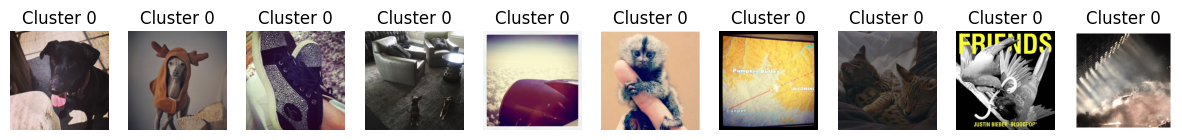

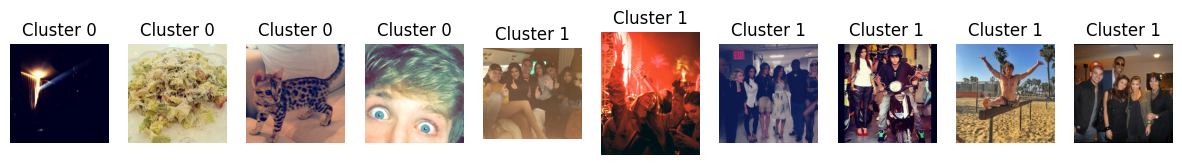

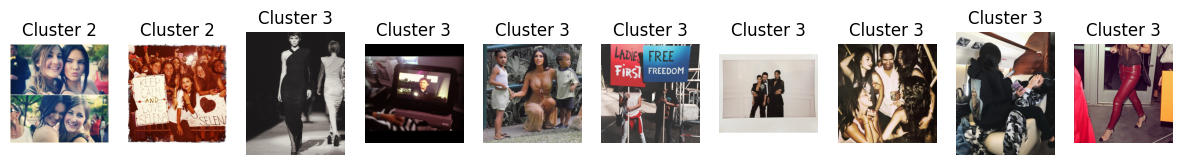

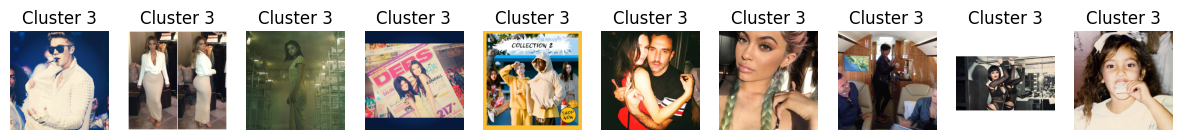

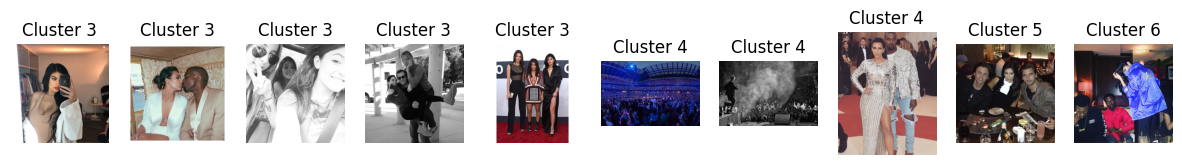

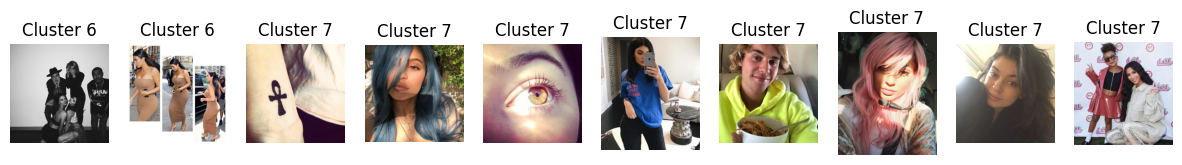

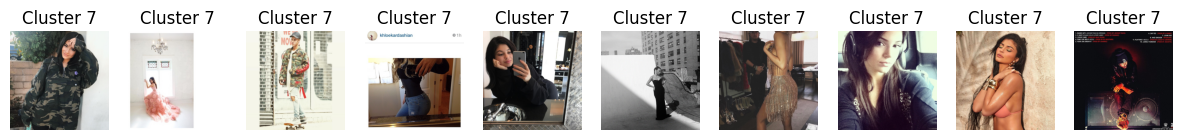

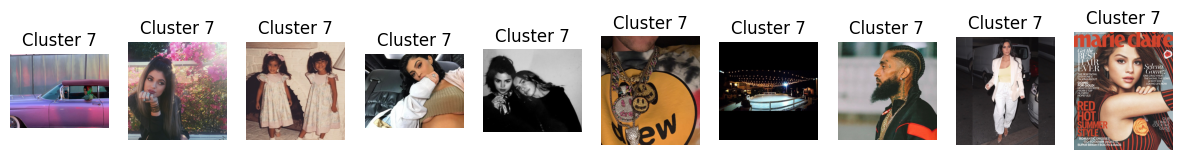

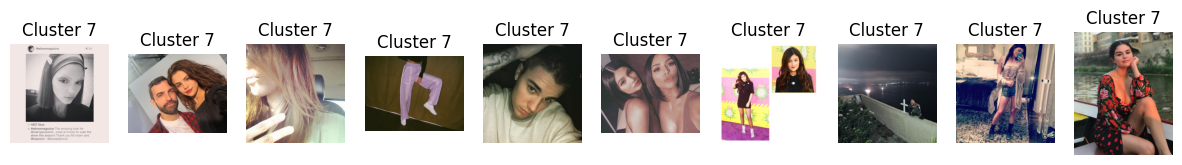

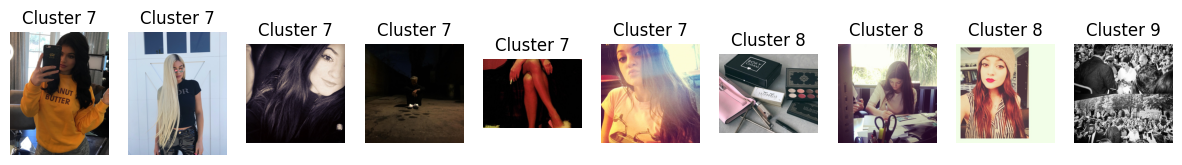

In [42]:
# Process images in batches
batch_size = 10
image_dict = sorted_dict   # Your image dictionary

for i in range(0, len(image_dict), batch_size):
    batch_images = list(image_dict.keys())[i:i+batch_size]
    fig, axs = plt.subplots(1, len(batch_images), figsize=(15, 5))
    
    for j, ax in enumerate(axs):
        image_path = batch_images[j]
        cluster_label = image_dict[image_path]
        img = mpimg.imread(image_path)
        ax.imshow(img)
        ax.set_title(f'Cluster {cluster_label}')
        ax.axis('off')
    
    plt.show()

In [44]:
#Plot the clusters and there is not a lot of varation

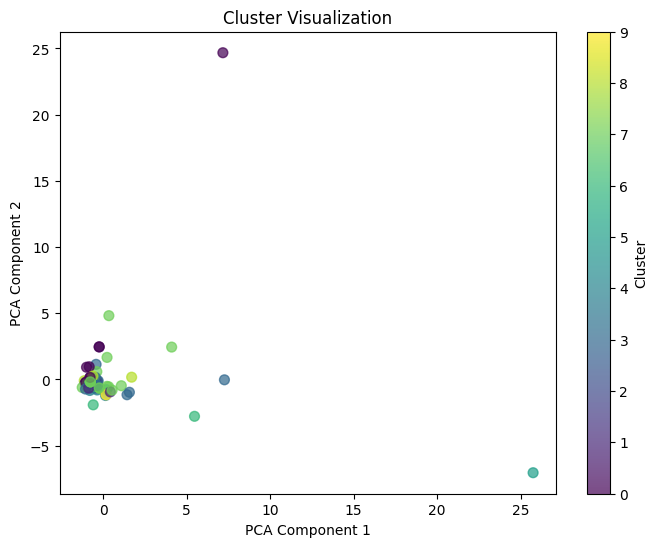

In [45]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce features to 2D using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_scaled)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.title("Cluster Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


In [47]:
import numpy as np
import cv2

# Function to extract color features
def extract_color_features(image_path, bins=32):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Could not read image: {image_path}")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Compute histograms for each channel
    hist_r = cv2.calcHist([image], [0], None, [bins], [0, 256])
    hist_g = cv2.calcHist([image], [1], None, [bins], [0, 256])
    hist_b = cv2.calcHist([image], [2], None, [bins], [0, 256])

    # Normalize histograms and flatten
    hist_r = cv2.normalize(hist_r, hist_r).flatten()
    hist_g = cv2.normalize(hist_g, hist_g).flatten()
    hist_b = cv2.normalize(hist_b, hist_b).flatten()

    # Concatenate histograms into a single feature vector
    histogram_features = np.concatenate([hist_r, hist_g, hist_b])
    return histogram_features  # Returns [R_mean, G_mean, B_mean]

# Function to create a combined feature vector with color spectrum
def build_combined_feature_vector_with_colors(labels, scores, image_path, num_labels):
    # Initialize two vectors: one for label frequency and one for score sums
    label_freq_vector = np.zeros(num_labels)  # Frequency of labels
    score_sum_vector = np.zeros(num_labels)  # Sum of scores for labels

    # Populate the detection feature vectors
    for label, score in zip(labels, scores):
        if 0 <= label < num_labels:  # Ensure the label is within valid range
            label_freq_vector[label] += 1       # Count frequency of the label
            score_sum_vector[label] += score   # Sum scores for the label

    # Combine detection vectors
    detection_vector = np.concatenate([label_freq_vector, score_sum_vector])

    # Extract color features
    color_features = extract_color_features(image_path)

    # Combine detection and color features
    combined_vector = np.concatenate([detection_vector, color_features])
    return combined_vector

# Apply the function to each row in the DataFrame
num_labels = 91  # COCO labels

# Assuming `image_paths` column in `df` contains the paths to the images
df['combined_feature_vector'] = df.apply(
    lambda row: build_combined_feature_vector_with_colors(
        row['labels'], row['scores'], row['image_name'], num_labels
    ),
    axis=1
)

# Extract features into a 2D array for clustering
features_combined = np.stack(df['combined_feature_vector'].to_numpy())
print("Feature shape (with color):", features_combined.shape)  # (num_images, 2 * num_labels + 3)

Feature shape (with color): (100, 278)


In [48]:
# Standardize the features to improve clustering
scaler1 = StandardScaler()
features_scaled = scaler1.fit_transform(features_combined)

# Apply K-Means clustering
kmeans1 = KMeans(n_clusters=10, random_state=42)  # Set desired number of clusters
clusters1 = kmeans1.fit_predict(features_scaled) #used the non scaled

clusters1

/Users/user/opt/miniconda3/envs/tf_clustering/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([5, 2, 4, 1, 2, 1, 8, 5, 0, 5, 5, 2, 1, 5, 1, 1, 4, 5, 5, 2, 4, 5,
       4, 5, 4, 3, 4, 4, 5, 5, 9, 5, 6, 5, 5, 2, 1, 4, 8, 5, 5, 8, 7, 5,
       1, 8, 0, 1, 2, 8, 0, 1, 8, 8, 4, 5, 4, 0, 5, 2, 2, 0, 5, 5, 0, 4,
       1, 8, 4, 4, 8, 2, 2, 1, 2, 5, 5, 5, 1, 4, 4, 2, 1, 4, 2, 1, 8, 2,
       5, 2, 4, 4, 2, 4, 5, 5, 0, 2, 0, 2], dtype=int32)

In [49]:
#make a dictionary of paths and cluster labels
image_clusters_detection_color = {image_path_list[i]: clusters1[i] for i in range(len(image_path_list))}

In [50]:
sorted_dict1 = dict(sorted(image_clusters_detection_color.items(), key=lambda x: x[1]))

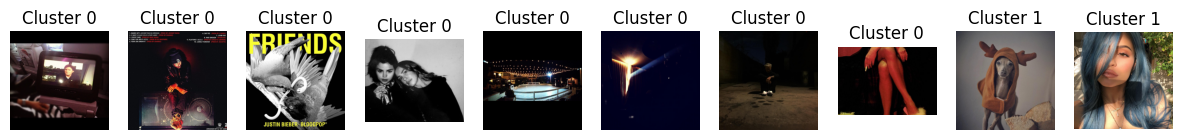

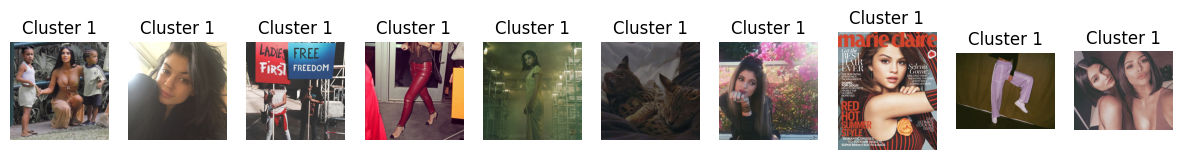

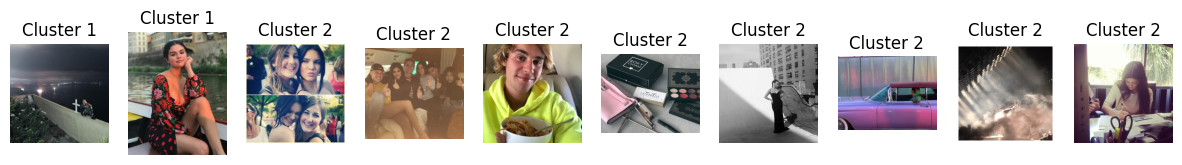

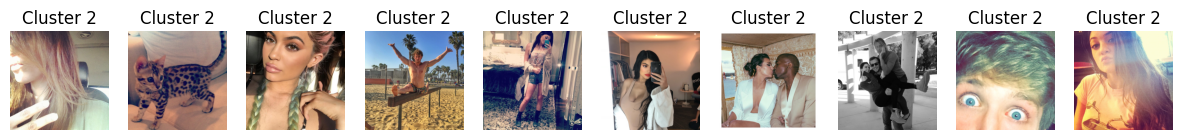

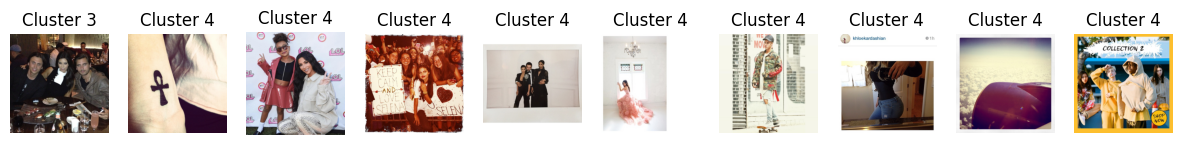

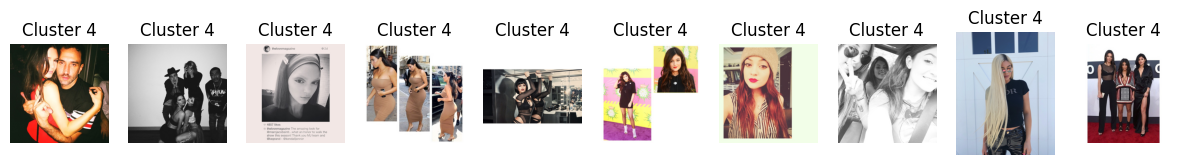

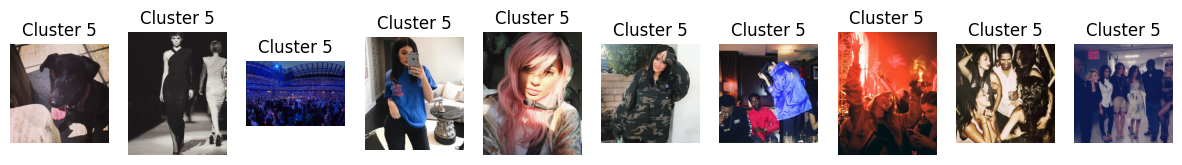

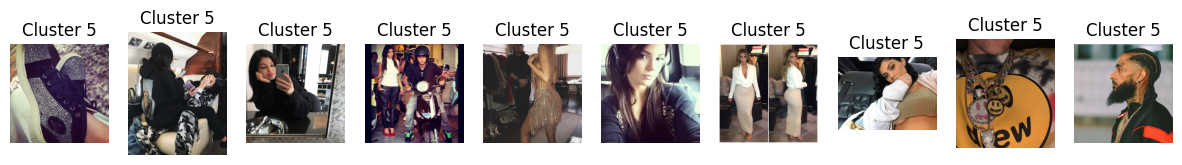

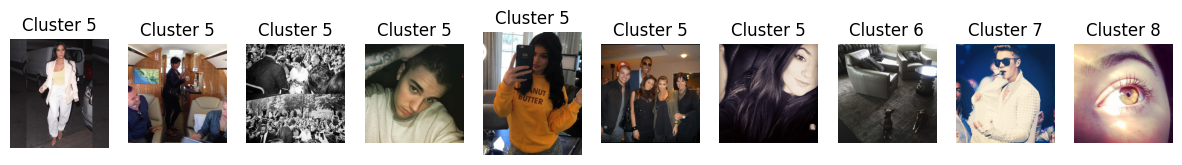

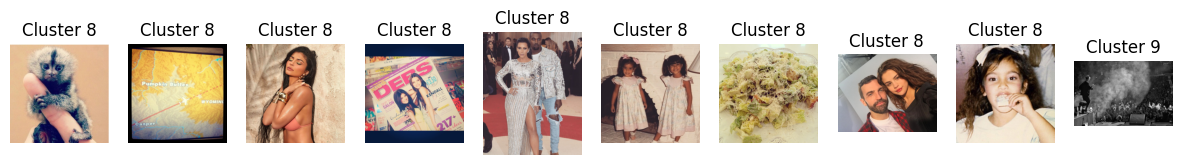

In [51]:
# Process images in batches
batch_size = 10
image_dict = sorted_dict1   # Your image dictionary

for i in range(0, len(image_dict), batch_size):
    batch_images = list(image_dict.keys())[i:i+batch_size]
    fig, axs = plt.subplots(1, len(batch_images), figsize=(15, 5))
    
    for j, ax in enumerate(axs):
        image_path = batch_images[j]
        cluster_label = image_dict[image_path]
        img = mpimg.imread(image_path)
        ax.imshow(img)
        ax.set_title(f'Cluster {cluster_label}')
        ax.axis('off')
    
    plt.show()

<h2> This is a basic example of VGG16 

In [57]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import cv2

In [58]:
# Load VGG16 model
base_model_2 = VGG16(weights='imagenet', include_top=False)

In [59]:
base_model_2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [65]:
# Low-level and high-level layers
#low_level_layer = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv2').output)
#high_level_layer = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)

# MORE UP LAYERS
#low_level_layer = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_conv3').output)
#high_level_layer = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_conv1').output)

# EVEN MORE UPPER LAYERS Low-level and high-level layers
low_level_layer = Model(inputs=base_model_2.input, outputs=base_model_2.get_layer('block2_conv1').output)
high_level_layer = Model(inputs=base_model_2.input, outputs=base_model_2.get_layer('block3_conv1').output)



def extract_features(image_path):
    # Preprocess image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    image = preprocess_input(np.expand_dims(image, axis=0))

    # Extract low- and high-level features
    low_features = low_level_layer.predict(image).flatten()
    high_features = high_level_layer.predict(image).flatten()
    
    # Combine the features
    combined_features = np.concatenate((low_features, high_features))
    print(combined_features.shape)
    # Standardize the features
    #scaler = MinMaxScaler()
    #combined_features_scaled = scaler.fit_transform(combined_features.reshape(1, -1))  # Reshape for a single sample
    print(combined_features.shape)
    
    return combined_features

# Example for one image
image_path = image_path_list
features_com = extract_features(image_path[1])
print("Feature shape:", features_com.shape)

1/1 [==============================] - 0s 304ms/step
(2408448,)
(2408448,)
Feature shape: (2408448,)


In [66]:
features_com

array([   0.     ,    0.     ,  650.47156, ..., 1310.8229 ,    0.     ,
        718.27185], dtype=float32)

In [67]:
# List of image paths
image_paths = image_path_list # Assuming this list contains the file paths of 50 images

# Extract features for all images
all_features_upper_layers  = [extract_features(image_path) for image_path in image_paths]

# Convert to a NumPy array for clustering
all_features_upper_layers = np.array(all_features_upper_layers)
print(f"Features shape: {all_features_upper_layers.shape}")  # Should be (50, n_features)

1/1 [==============================] - 0s 180ms/step
(2408448,)
(2408448,)
1/1 [==============================] - 0s 259ms/step
(2408448,)
(2408448,)
1/1 [==============================] - 0s 202ms/step
(2408448,)
(2408448,)
1/1 [==============================] - 0s 255ms/step
(2408448,)
(2408448,)
1/1 [==============================] - 0s 189ms/step
(2408448,)
(2408448,)
1/1 [==============================] - 0s 205ms/step
(2408448,)
(2408448,)
1/1 [==============================] - 0s 362ms/step
(2408448,)
(2408448,)
1/1 [==============================] - 0s 275ms/step
(2408448,)
(2408448,)
1/1 [==============================] - 0s 208ms/step
(2408448,)
(2408448,)
1/1 [==============================] - 0s 196ms/step
(2408448,)
(2408448,)
1/1 [==============================] - 0s 183ms/step
(2408448,)
(2408448,)
1/1 [==============================] - 0s 223ms/step
(2408448,)
(2408448,)
1/1 [==============================] - 0s 183ms/step
(2408448,)
(2408448,)
1/1 [====================

In [68]:
from sklearn.cluster import KMeans

In [70]:
len(image_path_list)

100

In [71]:
all_features_upper_layers.shape

(100, 2408448)

In [72]:
# Perform KMeans clustering
n_clusters = 5
kmeans_com = KMeans(n_clusters=n_clusters, random_state=42,max_iter=200,n_init=10)
kmeans_com.fit(all_features_upper_layers.astype(np.float64))

# Get cluster labels
cluster_labels_all_com = kmeans_com.labels_
print("Cluster labels:", cluster_labels_all_com)

Cluster labels: [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 0 4 0 0 4 0
 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 0 2 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4
 4 4 1 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [73]:
cluster_labels_all_com

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [74]:
image_clusters_all_com = {image_paths[i]: cluster_labels_all_com[i] for i in range(len(image_paths))}

In [75]:
sorted_dict1 = dict(sorted(image_clusters_all_com.items(), key=lambda x: x[1]))

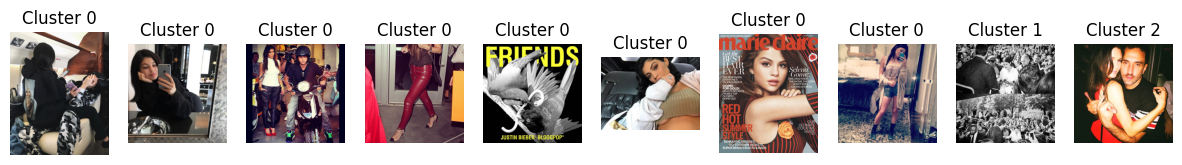

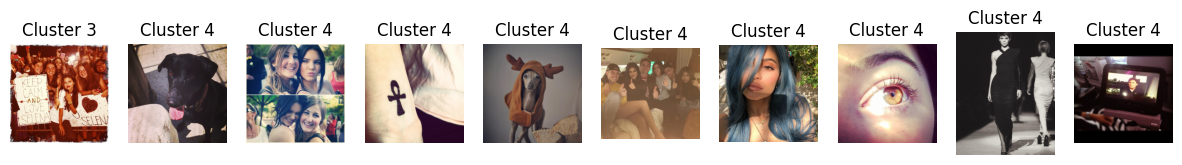

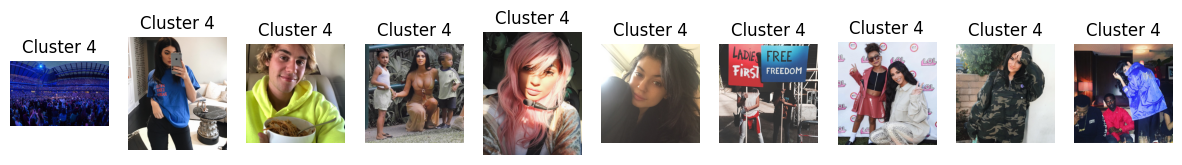

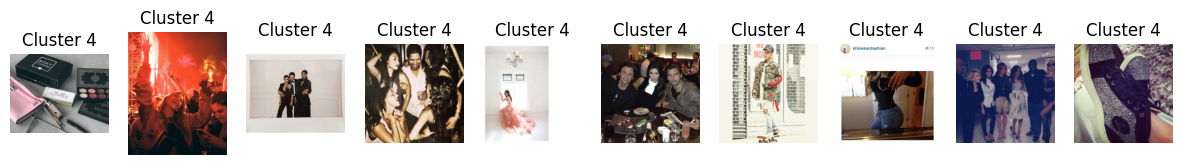

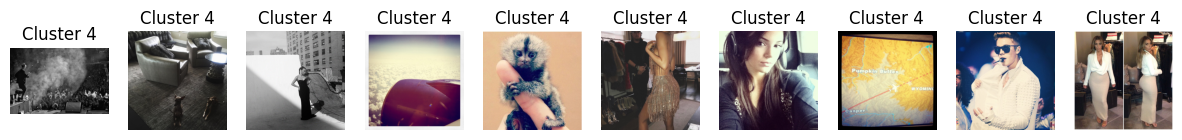

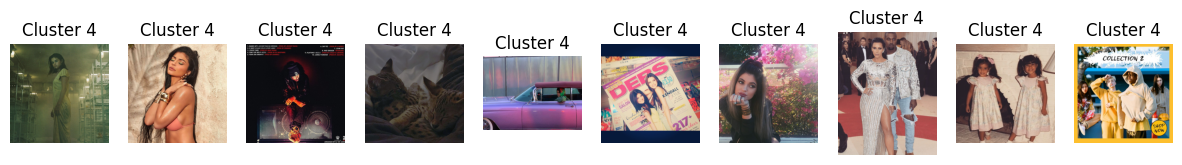

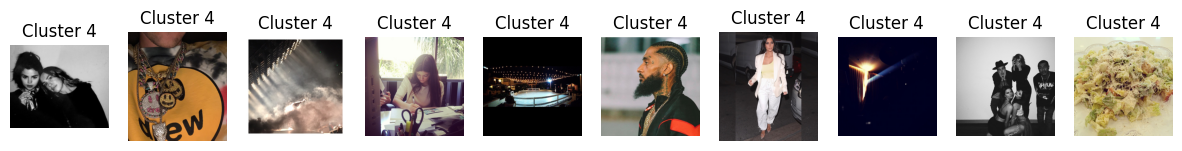

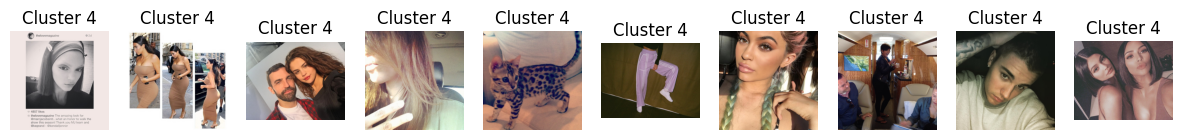

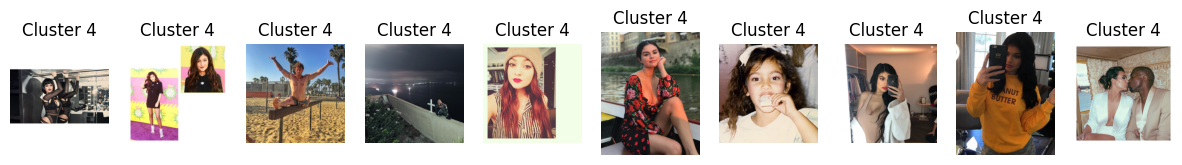

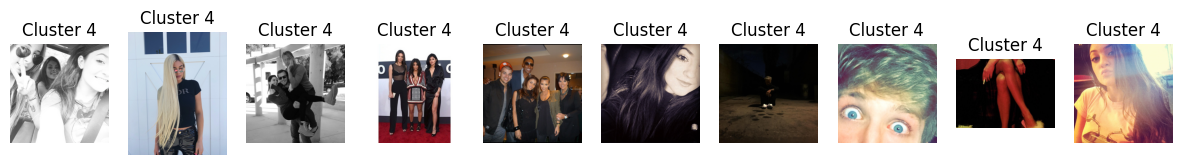

In [76]:
# Process images in batches
batch_size = 10
image_dict = sorted_dict1   # Your image dictionary

for i in range(0, len(image_dict), batch_size):
    batch_images = list(image_dict.keys())[i:i+batch_size]
    fig, axs = plt.subplots(1, len(batch_images), figsize=(15, 5))
    
    for j, ax in enumerate(axs):
        image_path = batch_images[j]
        cluster_label = image_dict[image_path]
        img = mpimg.imread(image_path)
        ax.imshow(img)
        ax.set_title(f'Cluster {cluster_label}')
        ax.axis('off')
    
    plt.show()